## Submit job

In [6]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from pathlib import Path

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path="program/check_rabi.py",
    device_id="urchin-pulse",
    name="check_rabi",
)
print(f"job_id = {job.job_id}")
job.wait_for_completion()
print(f"job_status = {job.status}")
print(f"elapsed_time={job.execution_time}")

job_id = 068d43e5-89ff-717f-8000-6979c4aaae95
job_status = succeeded
elapsed_time=24.463


## Download job result

In [7]:
Path("download").mkdir(exist_ok=True)
backend.download_log(
    job_id=job.job_id,
    save_dir="download",
)


'download/sselog_068d43e5-89ff-717f-8000-6979c4aaae95.zip'

## Extract zip file

In [8]:
import zipfile
zip_path = Path(f"download/sselog_{job.job_id}.zip")
extract_dir = Path("extracted")

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)
log_path = extract_dir / "ssecontainer.log"
new_log_path = extract_dir / f"sselog_{job.job_id}.log"

# rename
if log_path.exists():
    log_path.rename(new_log_path)

print("extracted file:", list(extract_dir.rglob("*")))

with new_log_path.open(encoding="utf-8") as f:
    for i, line in enumerate(f, start=1):
        print(f"{i}: {line.strip()}")

extracted file: [PosixPath('extracted/sselog_068d43a1-8db5-7ed2-8000-a70b43690f76.log'), PosixPath('extracted/sselog_068d4398-51f5-79c9-8000-eca7e8f7b08e.log'), PosixPath('extracted/ssecontainer_068d438e-ab45-7d8b-8000-49abd316f766.log'), PosixPath('extracted/sselog_068d43c0-bf35-7017-8000-2912b8176b35.log'), PosixPath('extracted/sselog_068d43e5-89ff-717f-8000-6979c4aaae95.log'), PosixPath('extracted/sselog_068d43d7-2c3a-776e-8000-70b2ffcb2a20.log')]
1: Python 3.11.9 (main, Sep  4 2024, 23:15:21) [GCC 12.2.0] on linux
2: Type "help", "copyright", "credits" or "license" for more information.
3: >>> start program
4: Failed to load the skew file: 'NoneType' object is not subscriptable
5: ========================================
6: date: 2025-09-24 18:54:24
7: python: 3.11.9
8: qubex: 1.4.1b1+6937eef
9: env: /app/.venv
10: config: /home/shared/qubex-config/144Qv2/config
11: params: /home/shared/qubex-config/144Qv2/params
12: chip: 144Qv2 (3rdlotNo6Chip0.0)
13: qubits: ['Q024', 'Q025', 'Q02

## Extract payload

In [9]:
from pathlib import Path
import ast

payloads = []
with new_log_path.open(encoding="utf-8") as f:
    for line in f:
        if "payload=" in line:
            rhs = line.split("payload=", 1)[1].strip()
            try:
                data = ast.literal_eval(rhs)
                payloads.append(data)
            except Exception as e:
                print("parse error:", e)

print(payloads)


[{'mode': '', 'data': {'Q024': {'raw': {'I': [0.0038834407459944487, 0.0037796306423842907, 0.0009590744157321751, 0.0001993117039091885, -0.00152921536937356, -0.0010654457146301866, 0.000309914379613474, 0.002542319940403104, 0.00396492937579751, 0.004431749228388071, 0.0023955015931278467, 0.00238632969558239, 8.997888653539121e-05, -0.0005419697263278067, -0.00045563175808638334, 0.0005055244546383619, 0.0038238984998315573, 0.0038769724778831005, 0.0028123725205659866, 0.002448969753459096, 0.0006663797539658844, -0.0002984530874527991, 0.0007874546572566032, 0.0010115441400557756, 0.003386049997061491, 0.004083248320966959, 0.004862270317971706, 0.0021272553130984306, 0.0010038373293355107, 0.0008652504766359925, -0.00031935019069351256, 0.0004869205877184868, 0.0016863474156707525, 0.0034539394546300173, 0.004018126521259546, 0.0033601841423660517, 0.001442858949303627, -0.00021674641175195575, 0.0004729586362373084, 0.0001526140986243263, 0.0019423177000135183, 0.00343258073553

## Plot IQ data

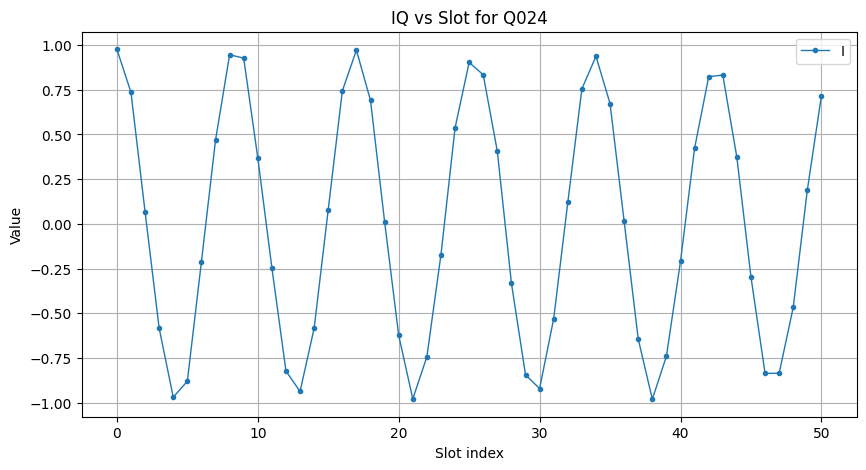

In [13]:
import matplotlib.pyplot as plt
p = payloads[0]

raw = p["data"]["Q024"]["normalized"]
i = raw["I"]

slots = list(range(len(i)))

plt.figure(figsize=(10, 5))
plt.plot(slots, i, label="I", marker="o", markersize=3, linewidth=1)
plt.xlabel("Slot index")
plt.ylabel("Value")
plt.title("IQ vs Slot for Q024")
plt.legend()
plt.grid(True)
plt.show()